In [1]:
import pandas as pd
from datetime import datetime
from datetime import time
import matplotlib.pyplot as plt

In [2]:
# reading all call records
calls_22 = pd.read_csv("data/policecalls2022.csv")
calls_23 = pd.read_csv("data/policecalls2023.csv")
calls_24 = pd.read_csv("data/policecalls2024.csv")

In [3]:
calls = pd.concat([calls_22, calls_23, calls_24], ignore_index=True)

In [4]:
calls.dtypes

CDTS                object
EID                  int64
START_DATE          object
CALL_NUMBER         object
PRIORITY             int64
REPORT_DATE         object
OFFENSE_DATE        object
OFFENSE_TIME        object
CALLTYPE_CODE       object
CALL_TYPE           object
FINAL_DISPO_CODE    object
FINAL_DISPO         object
ADDRESS             object
CITY                object
STATE               object
dtype: object

### Columns
1. CDTS: Call Date Time Stamp - Represents the timestamp indicating the time of the call or when the system recorded the data.
2. EID: Event ID - Appears to be a unique identifier for an event or call.
3. START_DATE: Indicates the date and time when the call started.
4. CALL_NUMBER: May represent a unique number or identifier for the call.
5. PRIORITY: Indicates the priority of the call or event (e.g., urgent, important, normal).
6. REPORT_DATE: Indicates the date when the event or call was reported.
7. OFFENSE_DATE: Represents the date when the offense or event occurred.
8. OFFENSE_TIME: Represents the time when the offense or event occurred.
9. CALLTYPE_CODE: Represents the type of call with a code.
10. CALL_TYPE: Describes the actual type or content of the call.
11. FINAL_DISPO_CODE: Represents a code for the final disposition or outcome of the call or event.
12. FINAL_DISPO: Describes the final disposition or outcome of the call or event.
13. ADDRESS: Represents the address where the event or call occurred.
14. CITY: Represents the city where the event or call occurred.
15. STATE: Represents the state where the event or call occurred (applicable for the United States).

In [5]:
print(calls.columns)

Index(['CDTS', 'EID', 'START_DATE', 'CALL_NUMBER', 'PRIORITY', 'REPORT_DATE',
       'OFFENSE_DATE', 'OFFENSE_TIME', 'CALLTYPE_CODE', 'CALL_TYPE',
       'FINAL_DISPO_CODE', 'FINAL_DISPO', 'ADDRESS', 'CITY', 'STATE'],
      dtype='object')


In [6]:
# checking for missingness
calls.isna().sum()

CDTS                     0
EID                      0
START_DATE               0
CALL_NUMBER              0
PRIORITY                 0
REPORT_DATE              0
OFFENSE_DATE             0
OFFENSE_TIME             0
CALLTYPE_CODE            0
CALL_TYPE                0
FINAL_DISPO_CODE         0
FINAL_DISPO              0
ADDRESS             113995
CITY                     0
STATE                    0
dtype: int64

In [7]:
calls['CALL_TYPE'].unique()

array(['SUSPICIOUS PERSON', 'DISTURBANCE', 'UNK TYPE 911 CALL',
       'SUSPICIOUS CIRCUMSTANCES', 'NARCOTICS',
       'DISTURBANCE, FIRECRACKERS', 'FIREARMS DISCHARGED',
       'PEDESTRIAN STOP', 'WELFARE CHECK (COMBINED EVENT)',
       'PUBLIC SAFETY ASSISTANCE', 'ALARM, AUDIBLE', 'DISTURBANCE, MUSIC',
       'PROWLER', 'WELFARE CHECK', 'ALARM, SILENT', 'RECKLESS DRIVING',
       'SUSPICIOUS PERSON W/ WEAPON', 'MENTALLY DISTURBED PERSON',
       'BATTERY', 'BRANDISHING A WEAPON', 'PARKING VIOLATION',
       'VEHICLE STOP', 'SUSPICIOUS VEHICLE', 'DISTURBANCE, FAMILY',
       'MISDEMEANOR HIT AND RUN', 'THEFT', 'DISTURBANCE, FIGHT',
       'STOLEN VEHICLE', 'VEHICLE ACCIDENT, PROPERTY DAMAGE',
       'RECOVERED STOLEN VEHICLE', 'CARRYING A CONCEALED WEAPON',
       'FOUND PROPERTY', 'TRESPASSING', 'VEHICLE STOP ON FEMALE',
       'TRAFFIC HAZARD', 'MEET THE CITIZEN', 'DISTURBANCE, UNKNOWN',
       'ARMED ROBBERY', 'MISDEMEANOR DUI', 'GRAND THEFT',
       'MISSING FEMALE JUVENILE', 'COR

In [8]:
calls_22['CALL_TYPE'].value_counts()

CALL_TYPE
VEHICLE STOP                    247413
DISTURBANCE                     181151
WELFARE CHECK                   154367
ALARM, AUDIBLE                  129428
PARKING VIOLATION                94802
                                 ...  
W&I UNCONTROLLABLE JUVENILE          7
PETTY THEFT PRIOR CONVICTION         7
SUSPICIOUS PERSON (GANG)             5
THEFT, GANG RELATED                  5
NOISY ANIMAL                         4
Name: count, Length: 200, dtype: int64

In [9]:
calls['CALLTYPE_CODE'].unique()

array(['1066', '415', '911UNK', 'SUSCIR', '11300', '415FC', '1057',
       '1095', 'WELCKEMS', 'AID', '1033A', '415M', '1070', 'WELCK',
       '1033S', '23103', '1066W', '5150', '242', '417', '22500', '1195',
       '1154', '415F', '20002', '484', '415A', '10851', '1182', '10851R',
       '12025', 'FNDPRP', '602PC', '1195X', '1125', '1062', '415UNK',
       '211A', '23152', '487', '1065JX', '1055', '594', '6F', '1181',
       '459VEH', '415N', '314', '1183', '459', 'FDAID', '5150X', '6M',
       '422', '415W', '211SA', '12020', '245', 'DVRO', '1124', '1065',
       '1180', '1034', '1091', '459R', '1033', '1091AEMS', '11550',
       '415MC', '1179', '1066P', '245EMS', '14601', '415AEMS', '246',
       '242EMS', '1065MH', '415EMS', '594G', '1091D', '211', '1091A',
       '1065J', '1065F', 'CIVIL', '1080', '451', '20001', '148G', '4000A',
       '10852', 'THEFT', '415FEMS', '904', '484BOL', '148', '368',
       '415UNKEMS', '243', '647F', '240', '22507', '488', '11377G', '647',
       '50

In [10]:
calls['CALLTYPE_CODE'].value_counts()

CALLTYPE_CODE
1195      439816
415       370679
WELCK     324931
1033A     279998
22500     199219
           ...  
602.11         7
10751          7
308            7
BARCK          7
CURF           7
Name: count, Length: 212, dtype: int64

In [11]:
# let us first make column names lowercase
calls.columns = calls.columns.str.lower()
# calls_22.columns = calls_22.columns.str.lower()
# calls_23.columns = calls_22.columns.str.lower()
# calls_24.columns = calls_22.columns.str.lower()

In [12]:
# EID is a identification so let us make it an object
calls['eid'] = calls['eid'].astype(str)
# calls_22['eid'] = calls_22['eid'].astype(str)
# calls_23['eid'] = calls_23['eid'].astype(str)
# calls_24['eid'] = calls_24['eid'].astype(str)

In [13]:
calls = calls.drop(columns=['city','state'])
# calls_22 = calls_22.drop(columns=['city','state'])
# calls_23 = calls_23.drop(columns=['city','state'])
# calls_24 = calls_24.drop(columns=['city','state'])

In [14]:
calls["Timestamp"] = pd.to_datetime(calls["cdts"].str[:14], format='%Y%m%d%H%M%S', errors='coerce')
# calls_22["Timestamp"] = pd.to_datetime(calls_22["cdts"].str[:14], format='%Y%m%d%H%M%S', errors='coerce')
# calls_23["Timestamp"] = pd.to_datetime(calls_23["cdts"].str[:14], format='%Y%m%d%H%M%S', errors='coerce')
# calls_24["Timestamp"] = pd.to_datetime(calls_24["cdts"].str[:14], format='%Y%m%d%H%M%S', errors='coerce')

In [15]:
different_dates = calls[calls["report_date"] != calls["offense_date"]]

print(different_dates)

# different_dates_22 = calls_22[calls_22["report_date"] != calls_22["offense_date"]]
# different_dates_23 = calls_23[calls_23["report_date"] != calls_23["offense_date"]]
# different_dates_24 = calls_24[calls_24["report_date"] != calls_24["offense_date"]]

# print(different_dates_22)
# print(different_dates_23)
# print(different_dates_24)

Empty DataFrame
Columns: [cdts, eid, start_date, call_number, priority, report_date, offense_date, offense_time, calltype_code, call_type, final_dispo_code, final_dispo, address, Timestamp]
Index: []


In [17]:
different_dispo = calls[calls["final_dispo_code"] != calls["final_dispo"]]
print(different_dispo)

                     cdts      eid            start_date call_number  \
0        20220101042916PS  8913184  1/1/2022 12:00:00 AM  P220010180   
1        20220101043036PS  8913196  1/1/2022 12:00:00 AM  P220010191   
2        20220101043827PS  8913252  1/1/2022 12:00:00 AM  P220010236   
3        20220101044026PS  8913216  1/1/2022 12:00:00 AM  P220010206   
4        20220102052501PS  8914182  1/1/2022 12:00:00 AM  P220010965   
...                   ...      ...                   ...         ...   
3998458  20240228143421PS  9917241  3/2/2024 12:00:00 AM  P240590531   
3998459  20240228143423PS  9917234  3/2/2024 12:00:00 AM  P240590526   
3998460  20240228143755PS  9917176  3/2/2024 12:00:00 AM  P240590481   
3998461  20240228144042PS  9917220  3/2/2024 12:00:00 AM  P240590514   
3998462  20240228144148PS  9917267  3/2/2024 12:00:00 AM  P240590551   

         priority            report_date           offense_date offense_time  \
0               2   1/1/2022 12:00:00 AM   1/1/2022 12:

Every value for report_date and offense_date is same.
Remove unnecessary columns: report_date, offense_date, start_date, cdts

In [18]:
pp_calls = calls.drop(columns=['eid',
                                     'call_number',
                                     'report_date', 
                                     'offense_date', 
                                     'start_date', 
                                     'cdts'])
# pp_calls_22 = calls_22.drop(columns=['eid',
#                                      'call_number',
#                                      'report_date', 
#                                      'offense_date', 
#                                      'start_date', 
#                                      'cdts'])

# pp_calls_23 = calls_23.drop(columns=['eid',
#                                      'call_number',
#                                      'report_date', 
#                                      'offense_date', 
#                                      'start_date', 
#                                      'cdts'])

# pp_calls_24 = calls_24.drop(columns=['eid',
#                                      'call_number',
#                                      'report_date', 
#                                      'offense_date', 
#                                      'start_date', 
#                                      'cdts'])

In [19]:
print(pp_calls)

         priority offense_time calltype_code                 call_type  \
0               2     02:49:02          1066         SUSPICIOUS PERSON   
1               2     03:05:51           415               DISTURBANCE   
2               2     04:35:25        911UNK         UNK TYPE 911 CALL   
3               2     03:38:14        SUSCIR  SUSPICIOUS CIRCUMSTANCES   
4               4     23:25:49         11300                 NARCOTICS   
...           ...          ...           ...                       ...   
3998458         6     14:08:34          1195              VEHICLE STOP   
3998459         5     14:06:06         22500         PARKING VIOLATION   
3998460         2     13:14:37           242                   BATTERY   
3998461         6     13:53:41          1195              VEHICLE STOP   
3998462         6     14:32:08          1195              VEHICLE STOP   

        final_dispo_code                                   final_dispo  \
0                      N      No repo

In [22]:
dispo_mapping = {}

for index, row in pp_calls.iterrows():
    dispo_code = row['final_dispo_code']
    dispo = row['final_dispo']
    dispo_mapping[dispo_code] = dispo

print(dispo_mapping)

{'N': 'No report required; dispatch record only', 'CAN': 'Canceled', 'A': 'Arrest Made', 'GD': 'No Disposition', 'T': 'Turned over To (TOT)', 'NR': 'No Response', 'G': 'Gone on Arrival/unable to locate', 'R': 'Report taken', 'DUPNCAN': 'No Disposition', 'D': 'Traffic Citation Issued, Hazardous Violation', 'U': 'Unfounded event', 'H': 'Courtesy Service/Citizen or agency assist', 'E': 'Traffic Citation Issued, Non-Hazardous Violation', 'O': 'Supplemental report taken', 'B': 'Arrest by Warrant', 'ADV': 'No Disposition', 'F': 'Field Interview (F.I.) Completed', 'C': 'Criminal Citation', 'P': 'Prior case, follow-up activity only', 'M': 'Stranded motorist assist', 'Z': 'No Disposition', 'TOT': 'No Disposition'}


'N': 'No report required; dispatch record only'

'CAN': 'Canceled'

'A': 'Arrest Made'

'GD': 'No Disposition'

'T': 'Turned over To (TOT)'

'NR': 'No Response'

'G': 'Gone on Arrival/unable to locate'

'R': 'Report taken'

'DUPNCAN': 'No Disposition'

'D': 'Traffic Citation Issued, Hazardous Violation'

'U': 'Unfounded event'

'H': 'Courtesy Service/Citizen or agency assist'

'E': 'Traffic Citation Issued, Non-Hazardous Violation'

'O': 'Supplemental report taken'

'B': 'Arrest by Warrant'

'ADV': 'No Disposition'

'F': 'Field Interview (F.I.) Completed'

'C': 'Criminal Citation'

'P': 'Prior case, follow-up activity only'

'M': 'Stranded motorist assist'

'Z': 'No Disposition'

'TOT': 'No Disposition'

In [23]:
pp_calls = pp_calls.drop(columns=['final_dispo'])
# pp_calls_22 = pp_calls_22.drop(columns=['final_dispo'])
# pp_calls_23 = pp_calls_23.drop(columns=['final_dispo'])
# pp_calls_24 = pp_calls_24.drop(columns=['final_dispo'])

In [24]:
calltype_mapping = {}

for index, row in pp_calls.iterrows():
    calltype_code = row['calltype_code']
    calltype = row['call_type']
    calltype_mapping[calltype_code] = calltype

print(len(calltype_mapping))
print(calltype_mapping)

212
{'1066': 'SUSPICIOUS PERSON', '415': 'DISTURBANCE', '911UNK': 'UNK TYPE 911 CALL', 'SUSCIR': 'SUSPICIOUS CIRCUMSTANCES', '11300': 'NARCOTICS', '415FC': 'DISTURBANCE, FIRECRACKERS', '1057': 'FIREARMS DISCHARGED', '1095': 'PEDESTRIAN STOP', 'WELCKEMS': 'WELFARE CHECK (COMBINED EVENT)', 'AID': 'PUBLIC SAFETY ASSISTANCE', '1033A': 'ALARM, AUDIBLE', '415M': 'DISTURBANCE, MUSIC', '1070': 'PROWLER', 'WELCK': 'WELFARE CHECK', '1033S': 'ALARM, SILENT', '23103': 'RECKLESS DRIVING', '1066W': 'SUSPICIOUS PERSON W/ WEAPON', '5150': 'MENTALLY DISTURBED PERSON', '242': 'BATTERY', '417': 'BRANDISHING A WEAPON', '22500': 'PARKING VIOLATION', '1195': 'VEHICLE STOP', '1154': 'SUSPICIOUS VEHICLE', '415F': 'DISTURBANCE, FAMILY', '20002': 'MISDEMEANOR HIT AND RUN', '484': 'THEFT', '415A': 'DISTURBANCE, FIGHT', '10851': 'STOLEN VEHICLE', '1182': 'VEHICLE ACCIDENT, PROPERTY DAMAGE', '10851R': 'RECOVERED STOLEN VEHICLE', '12025': 'CARRYING A CONCEALED WEAPON', 'FNDPRP': 'FOUND PROPERTY', '602PC': 'TRESPASS

In [25]:
pp_calls = pp_calls.drop(columns=['call_type'])
# pp_calls_22 = pp_calls_22.drop(columns=['call_type'])
# pp_calls_23 = pp_calls_23.drop(columns=['call_type'])
# pp_calls_24 = pp_calls_24.drop(columns=['call_type'])

In [26]:
pp_calls['priority'].unique()

array([2, 4, 6, 3, 1, 5])

# Analysis of Police Call Data

### number of calls per day

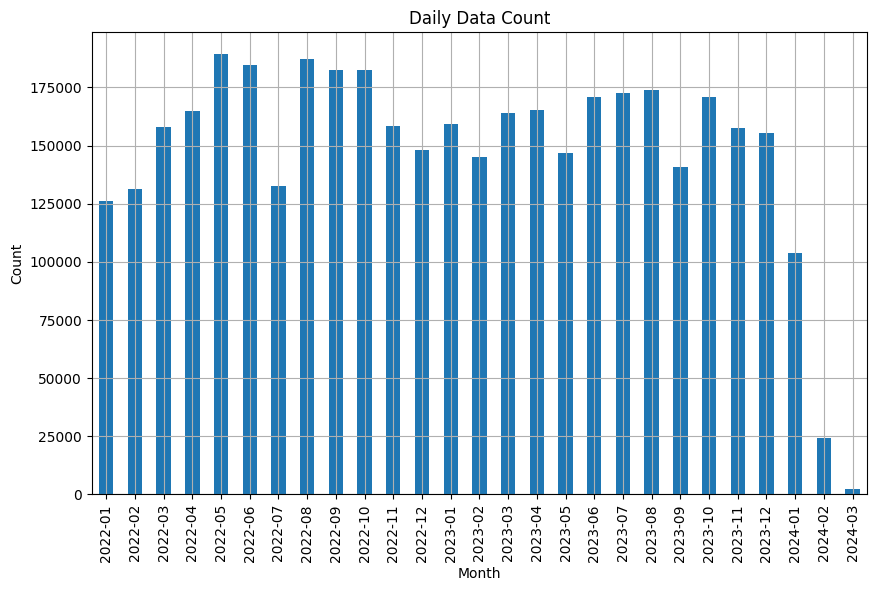

In [28]:
date_column = pp_calls['Timestamp'].dt.date

daily_count = pp_calls.groupby(pd.Grouper(key='Timestamp', freq='D')).size()
monthly_count = daily_count.groupby(daily_count.index.to_period('M')).sum()

monthly_count.plot(kind='bar', figsize=(10, 6))


plt.title('Daily Data Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

plt.xticks(range(len(monthly_count.index)), monthly_count.index.strftime('%Y-%m'))

plt.show()

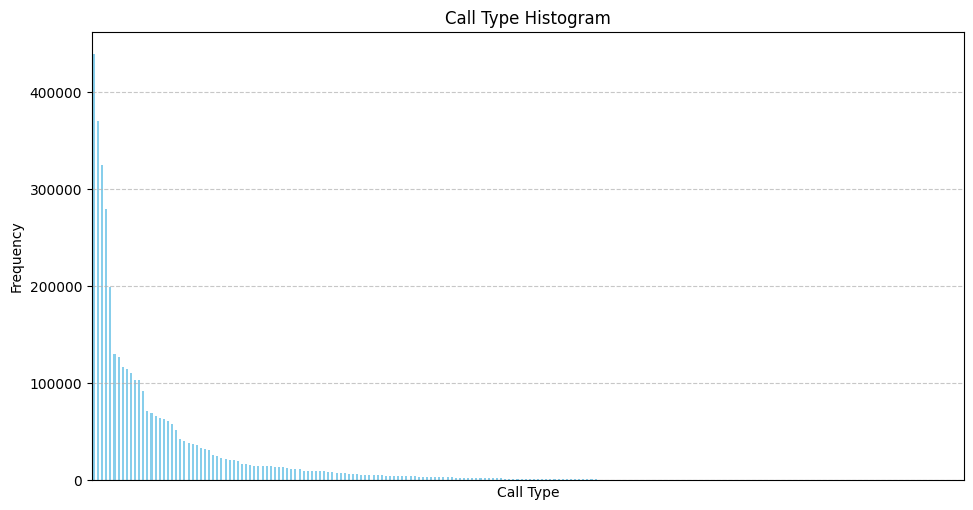

In [32]:
import matplotlib.pyplot as plt

# 'CALL_TYPE' 열의 빈도수 계산
call_type_counts = pp_calls['calltype_code'].value_counts()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
call_type_counts.plot(kind='bar', color='skyblue')  # 막대 그래프 생성
plt.title('Call Type Histogram')  # 그래프 제목 설정
plt.xlabel('Call Type')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 그리드 설정
plt.tight_layout()  # 그래프 레이아웃 조정
plt.xticks([]) 
plt.show()  # 그래프 출력

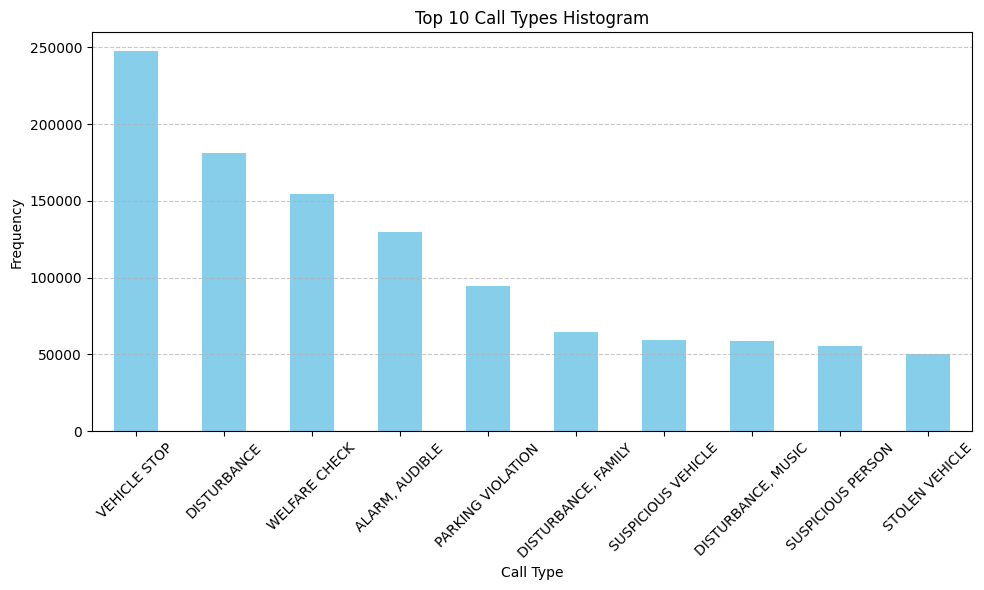

In [33]:
import matplotlib.pyplot as plt

# 상위 N개의 'CALL_TYPE' 빈도수 계산
top_n_call_types = calls_22['CALL_TYPE'].value_counts().nlargest(10)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
top_n_call_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Call Types Histogram')
plt.xlabel('Call Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
